In [137]:
# 导入工具包 numpy pandas用于数据处理  
import numpy as np
import pandas as pd

In [138]:
#读取数据，并删除第一列
df = pd.read_excel('price.xlsx')
df=df.iloc[:,1:]
df.tail()

,area,subway,district,price
5983,44.20,1,Xicheng,6000
5984,94.48,1,Xicheng,13000
5985,35.00,1,Xicheng,5600
5986,51.87,1,Xicheng,7000
5987,85.27,1,Xicheng,8800


In [139]:
#删除数据的缺失值
df1=df.dropna()
df1.tail()

,area,subway,district,price
5983,44.20,1,Xicheng,6000
5984,94.48,1,Xicheng,13000
5985,35.00,1,Xicheng,5600
5986,51.87,1,Xicheng,7000
5987,85.27,1,Xicheng,8800


In [140]:
#描述一下数据的统计信息，可以看到max部分为一个异常值，可以选择删除掉。但因为其合理性，在这里我们保留。
df1.describe()

,area,subway,price
count,5988.000000,5988.000000,5.988000e+03
mean,56.221675,0.280728,7.460704e+03
std,113.873993,0.449392,2.959955e+04
min,6.000000,0.000000,1.000000e+03
25%,20.000000,0.000000,3.900000e+03
50%,53.000000,0.000000,6.200000e+03
75%,68.000000,1.000000,7.800000e+03
max,8216.500000,1.000000,2.218455e+06


In [141]:
#进行one-hot编码
y=df1['price']
df2=pd.get_dummies(df1)
df2.columns

Index(['area', 'subway', 'price', 'district_Chaoyang', 'district_Dongcheng',
       'district_Haidian', 'district_Xicheng'],
      dtype='object')

In [142]:
#进行数据预处理 归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df3=min_max_scaler.fit_transform(df2)
df4 = pd.DataFrame(df3, columns=df2.columns)
df4.tail()

,area,subway,price,district_Chaoyang,district_Dongcheng,district_Haidian,district_Xicheng
5983,0.004653,1.0,0.002255,0.0,0.0,0.0,1.0
5984,0.010776,1.0,0.005412,0.0,0.0,0.0,1.0
5985,0.003532,1.0,0.002074,0.0,0.0,0.0,1.0
5986,0.005587,1.0,0.002706,0.0,0.0,0.0,1.0
5987,0.009655,1.0,0.003518,0.0,0.0,0.0,1.0


In [143]:
#进行逆归一化的准备，为最后一步做准备。以及展示下数据大小
yy=df2['price']
del df2['price']
y=df4['price']
x=df4.drop(columns = ['price'])
x.shape,y.shape

((5988, 6), (5988,))

In [144]:
#划分训练集测试集，取10%的测试集。
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(x,
                                                   y,
                                                   test_size = 0.1,
                                                   random_state = 0)

In [145]:
#导入线性回归模型 拟合模型
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
#使用模型在测试集和训练集上预测。
y_train_predict=model.predict(train_data)
y_train_predict=y_train_predict
y_test_predict=model.predict(test_data)
y_test_predict=y_test_predict

In [147]:
#训练集上的MAE和MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_train_predict, train_labels))
print(mean_squared_error(y_train_predict, train_labels) )

0.0019906083087438994
7.79402211238583e-06


In [148]:
#测试集上的MAE和MSE
print(mean_absolute_error(y_test_predict, test_labels))
print(mean_squared_error(y_test_predict, test_labels) )

0.0020494569955495914
9.451150097330596e-06


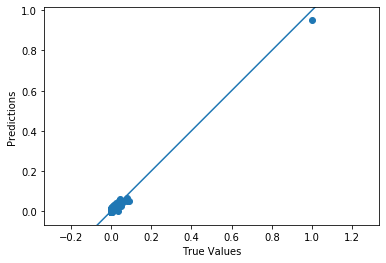

In [149]:
#在训练集上的预测效果
import matplotlib.pyplot as plt
plt.scatter(train_labels, y_train_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

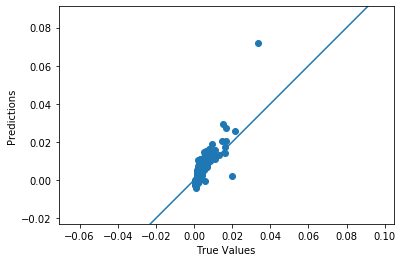

In [150]:
#在测试集上的预测效果
plt.scatter(test_labels, y_test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [153]:
#进行输入和预测
area = int(input("房屋面积："))
subway = int(input("是否临近地铁:"))
district1=int(input("是否在朝阳:"))
district2=int(input("是否在东城:"))
district3=int(input("是否在海淀:"))
district4=int(input("是否在西城:"))
data = {
    'area':[area],
    'subway':[subway],
    'district_Chaoyang':[district1],
    'district_Dongcheng':[district2],
    'district_Haidian':[district3],   
    'district_Xicheng':[district4]    
}
newdata=pd.DataFrame(data)
newdata=(newdata-df2.min())/(df2.max()-df2.min())
prediction=int(model.predict(newdata)*(yy.max()-yy.min())+yy.min())
print('预测价格为：',prediction)

房屋面积：80
是否临近地铁:1
是否在朝阳:1
是否在东城:0
是否在海淀:0
是否在西城:0
预测价格为： 9837
